In [6]:
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/breast-cancer.csv')
df = df.drop(columns=['id'])

# Label encoding for the diagnosis column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [7]:
# Select the model
rf_classifier = rfc(n_estimators=400, min_samples_leaf=0.12, random_state=42)

# Fit rf to the training set    
rf_classifier.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the test set RMSE
rmse_test = accuracy_score(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.98


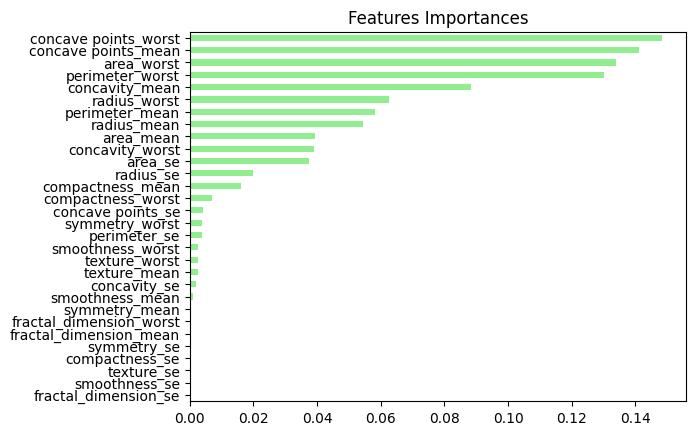

In [8]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_classifier.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [9]:
# The hyperparameters
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [19]:
# Define the dictionary 'params_rf'
params_rf = {
            'n_estimators' : [100,350,500],
            'max_features' : ['log2','auto','sqrt'],
            'min_samples_leaf' : [2,10,30]            
}

In [21]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

rf_classifier = rfc()

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf_classifier,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\vinor\Desktop\Develhope\projects\EDU-TreeBasedModels\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vinor\Desktop\Develhope\projects\EDU-TreeBasedModels\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vinor\Desktop\Develhope\projects\EDU-TreeBasedModels\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vinor\Desktop\Develhope\projects\EDU-Tre

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='accuracy', verbose=1)

In [22]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
accuracy = accuracy_score(y_test, y_pred)

# Print rmse_test
print('Test Accuracy of best model: {:.3f}'.format(accuracy)) 

Test Accuracy of best model: 0.974
